##  Linear Regression

In [1]:
%matplotlib notebook
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import threading
import time
from matplotlib import cm
import os
notebook_path = os.path.abspath("q1.ipynb")

In [2]:
def normalization(X):
    X_mean = np.mean(X)
    X_var= np.sum((X-X_mean)**2)/len(X)
    X_std_dev= np.sqrt(X_var)
    X_norm = (X- X_mean)/X_std_dev
    return X_norm

def cost(X1, theta1, Y1):
    return np.sum((np.dot(X1, theta1) - Y1) ** 2) /(2* len(Y1))

def grad_cost(X,theta, Y):
    temp = Y-np.dot(X,theta)
    temp2= temp * -X
    theta = (temp2.sum(axis=0))/(len(Y))
    return theta.T.reshape((theta.T.shape[0], 1))
 
def linear_reg(X_norm,Y, eta, thetas):
    theta = np.zeros((2, 1))
    thetas.append(theta[0][0])
    thetas.append(theta[1][0])
    count=0
    prev_cost=cost(X_norm, theta, Y)
    for i in range(100000):
        count+=1
        gcost=grad_cost(X_norm, theta, Y)
        theta = theta - eta * gcost
        curr_cost =  cost(X_norm, theta, Y)
        if abs(prev_cost-curr_cost)<= 10^-4:
            break
        prev_cost= curr_cost    
        if i%100==0 :
            thetas.append(theta[0][0])
            thetas.append(theta[1][0])
    return theta,count

def plot_hypothesis(X_norm,Y, res):
    sb.set()
    fig, ax = plt.subplots(figsize=(8, 6), dpi= 80)
    a=X_norm[:,1:2]
    ax.plot(a,Y,'b^')
    plt.xlabel('Acidity(x1)')
    plt.ylabel('Density(h(x))')
    plt.title('x-y')
    Y_dash =np.dot(X_norm,res)
    plt.plot(a,Y_dash,color='red')
    plt.show();
    return fig,ax

In [3]:
def animate(i, th0, th1, actual_cost,line):
    line.set_data(th0[:i],th1[:i])
    line.set_3d_properties(actual_cost[:i])
    return line,

def plot_surface(X_norm,Y, th0, th1, actual_cost):
    theta0 = np.linspace(0,2, 100)
    theta1 = np.linspace(-1,1,100)
    Theta0, Theta1 = np.meshgrid(theta0, theta1)
    zs = np.array([cost(X_norm,np.array([[i],[j]]),Y) for i,j in zip(np.ravel(Theta0), np.ravel(Theta1))])
    Cost = zs.reshape(Theta0.shape)
    
    #plotting
    fig = plt.figure(figsize=(8, 6), dpi= 80)
    ax = plt.axes(projection='3d')
    ax.plot_surface(Theta0, Theta1, Cost, cmap=cm.coolwarm,linewidth=0,antialiased=False, alpha=0.8)
    line, = ax.plot([],[],[],lw=2)
    ax.set_xlabel('theta0')
    ax.set_ylabel('theta1')
    ax.set_zlabel('J(theta)')
    anim = animation.FuncAnimation(fig, animate,frames=len(th0), fargs=(th0, th1, actual_cost, line), interval=200,
                           repeat_delay=1, blit=True)
    plt.show();
    return anim,plt


In [4]:
def animate2(i, th0, th1, line1):
    line1.set_data(th0[:i],th1[:i])
    return line1,

def plot_contour(X_norm,Y,th0, th1, actual_cost, fig_no):    
    fig2 = plt.figure(figsize=(8, 6), dpi= 80)
    ax=plt.axes()
    theta0 = np.linspace(0,2, 100)
    theta1 = np.linspace(-1,1,100)
    Theta0, Theta1 = np.meshgrid(theta0, theta1)
    zs = np.array([cost(X_norm,np.array([[i],[j]]),Y) for i,j in zip(np.ravel(Theta0), np.ravel(Theta1))])
    Cost = zs.reshape(Theta0.shape)
    ax.contour(Theta0, Theta1, Cost)
    ax.set_xlabel('theta0')
    ax.set_ylabel('theta1')
    line1, = ax.plot([],[],lw=1.5)
    anim2 = animation.FuncAnimation(fig2, animate2,frames=200, fargs=(th0, th1,line1),interval=200,repeat_delay=5, blit=True)
    plt.show();
    return anim2,ax

In [5]:
with open('data/q1/linearX.csv') as fp: 
    x=[]
    for line in fp:
        x.append(float(line[:-1]))
with open('data/q1/linearY.csv') as fp: 
    y=[]
    for line in fp:
        y.append(float(line[:-1]))

X1=np.array(x)
Y1=np.array(y)
X = X1.reshape((X1.shape[0], 1))
Y = Y1.reshape((Y1.shape[0], 1))               
X_norm1= normalization(X)
X_norm = np.append(np.ones((X_norm1.shape[0], 1)), X_norm1, axis = 1)
theta = np.zeros((2, 1))     

## 1(a)

**Parameters**:

$\theta_0 = 0.9966201 $ 

$\theta_1 = 0.0013402 $

**Learning Rate** - 0.02

**Stopping Criteria**
when difference in cost is less than $10^{-4}$

$J(\theta^{(i)}) - J(\theta^{(i+1)}) <= 0.0001$



In [6]:
thetas= []  
eta =0.02
res, itr = linear_reg(X_norm, Y,eta, thetas) 
print("parameters")
print(res)
print("cost", cost(X_norm,res,Y))
thetas1=np.array(thetas)
thetas = thetas1.reshape(int(thetas1.shape[0]/2), 2)

th0=[thetas[i][0] for i in range(thetas.shape[0])]
th1=[thetas[i][1] for i in range(thetas.shape[0])]
actual_cost= np.array([cost(X_norm, np.reshape(thetas[i],(2,1)), Y) for i in range(thetas.shape[0])])
        

parameters
[[0.9966201]
 [0.0013402]]
cost 1.1947898109836582e-06


## (b) Plot of Hypothesis Function

<IPython.core.display.Javascript object>


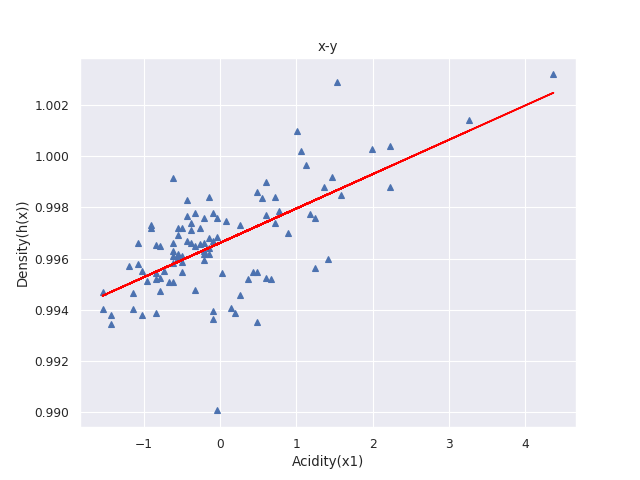

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d979703d0>)

In [7]:
plot_hypothesis(X_norm, Y, res)

## (c) Cost Function

<IPython.core.display.Javascript object>


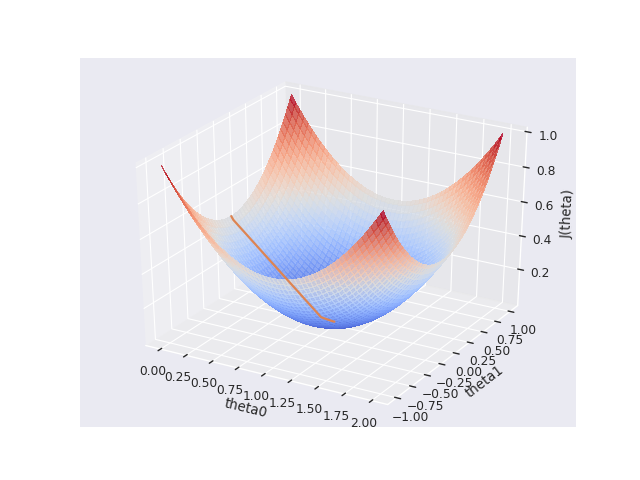

(<matplotlib.animation.FuncAnimation at 0x7f7d69640210>,
 <module 'matplotlib.pyplot' from '/home/komal/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

In [8]:
plot_surface(X_norm, Y,th0, th1, actual_cost)

<IPython.core.display.Javascript object>


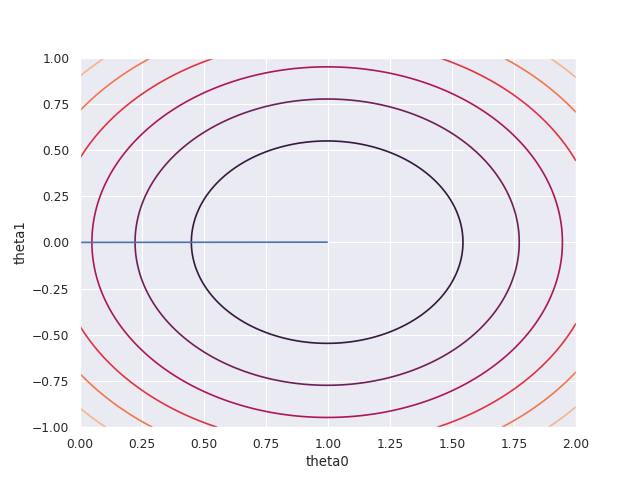

(<matplotlib.animation.FuncAnimation at 0x7f7d68f46c90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d68f21a90>)

In [9]:
plot_contour(X_norm,Y,th0, th1, actual_cost,2)

## (d) Contours of error function

## (e) Learning Rate = 0.001

In [10]:
thetas= []  
eta =0.001
#linear Regression
start = time.time()
res, itr = linear_reg(X_norm, Y,eta, thetas) 
print("parameters")
print(res)
print("cost", cost(X_norm,res,Y))
print('time', time.time()-start)
thetas1=np.array(thetas)
thetas = thetas1.reshape(int(thetas1.shape[0]/2), 2)

th0=[thetas[i][0] for i in range(thetas.shape[0])]
th1=[thetas[i][1] for i in range(thetas.shape[0])]
actual_cost= np.array([cost(X_norm, np.reshape(thetas[i],(2,1)), Y) for i in range(thetas.shape[0])])
        

parameters
[[0.9966201]
 [0.0013402]]
cost 1.1947898109836603e-06
time 7.652602672576904


<IPython.core.display.Javascript object>


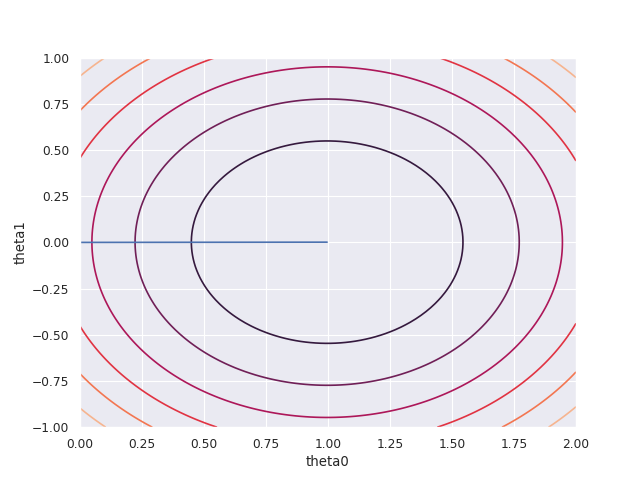

(<matplotlib.animation.FuncAnimation at 0x7f7d69263d10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d69263e90>)

In [11]:
plot_contour(X_norm,Y,th0, th1, actual_cost,2)

 ## Learning Rate = 0.025

In [12]:
thetas= []  
eta =0.025
start = time.time()
res, itr = linear_reg(X_norm, Y,eta, thetas) 
print("parameters",res.reshape(1,2))
print("cost", cost(X_norm,res,Y))
print('time-', time.time()-start )
thetas1=np.array(thetas)
thetas = thetas1.reshape(int(thetas1.shape[0]/2), 2)
th0=[thetas[i][0] for i in range(thetas.shape[0])]
th1=[thetas[i][1] for i in range(thetas.shape[0])]
actual_cost= np.array([cost(X_norm, np.reshape(thetas[i],(2,1)), Y) for i in range(thetas.shape[0])])


parameters [[0.9966201 0.0013402]]
cost 1.194789810983658e-06
time- 8.289721727371216


## Countour of error function

<IPython.core.display.Javascript object>


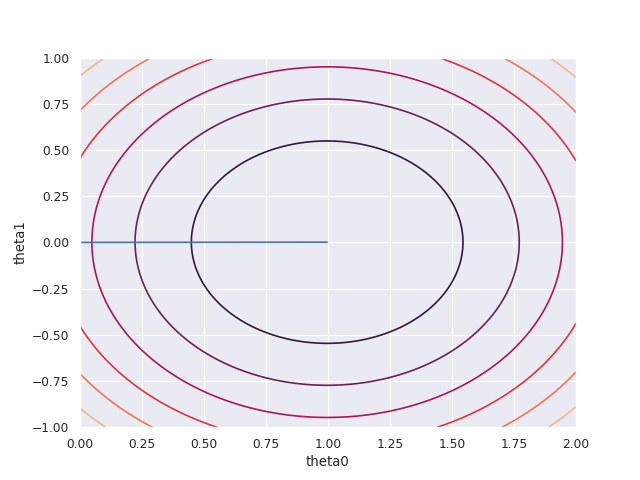

(<matplotlib.animation.FuncAnimation at 0x7f7d68e45e90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d68e9ed90>)

In [13]:
plot_contour(X_norm,Y,th0, th1, actual_cost,3)

## Learning Rate = 0.1

In [14]:
thetas= []  
eta =0.1
start = time.time()
res, itr = linear_reg(X_norm, Y,eta, thetas) 
print("parameters")
print(res)
print("cost", cost(X_norm,res,Y))
print('time', time.time()-start)
thetas1=np.array(thetas)
thetas = thetas1.reshape(int(thetas1.shape[0]/2), 2)

th0=[thetas[i][0] for i in range(thetas.shape[0])]
th1=[thetas[i][1] for i in range(thetas.shape[0])]
actual_cost= np.array([cost(X_norm, np.reshape(thetas[i],(2,1)), Y) for i in range(thetas.shape[0])])


parameters
[[0.9966201]
 [0.0013402]]
cost 1.1947898109836607e-06
time 8.900159358978271


<IPython.core.display.Javascript object>


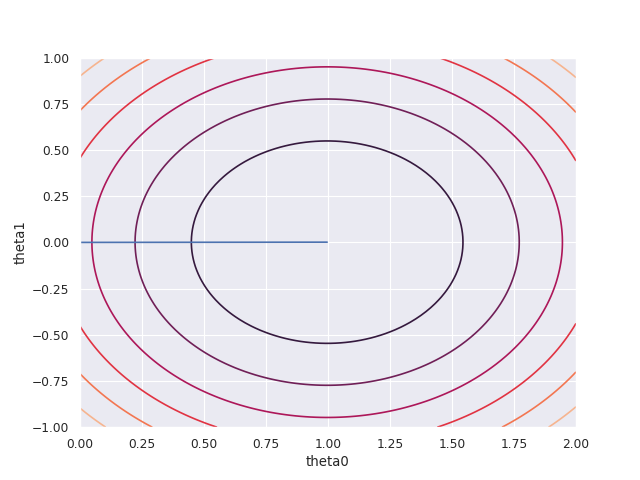

(<matplotlib.animation.FuncAnimation at 0x7f7d68c8ded0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d68e64ad0>)

In [15]:
plot_contour(X_norm,Y,th0, th1, actual_cost,4)

## (e)Observation

When learning rate is low it takes more time to converge as compared to high learning rate but learning rate can be at certain limits as at 2.5 or after that it starts diverging .
Time taken in each case

Learning rate   time taken 

0.001       $\quad$     7.1404218673706055

0.025        $\quad$   7.627198219299316

0.1        $\quad$       6.640247821807861     
